In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix

In [166]:
pip install ucimlrepo

In [167]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ionosphere = fetch_ucirepo(id=52)

# data (as pandas dataframes)
X = ionosphere.data.features
y = ionosphere.data.targets

# metadata
print(ionosphere.metadata)

# variable information
print(ionosphere.variables)


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [168]:
X,y

(     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
 0             1           0     0.99539    -0.05889     0.85243     0.02306   
 1             1           0     1.00000    -0.18829     0.93035    -0.36156   
 2             1           0     1.00000    -0.03365     1.00000     0.00485   
 3             1           0     1.00000    -0.45161     1.00000     1.00000   
 4             1           0     1.00000    -0.02401     0.94140     0.06531   
 ..          ...         ...         ...         ...         ...         ...   
 346           1           0     0.83508     0.08298     0.73739    -0.14706   
 347           1           0     0.95113     0.00419     0.95183    -0.02723   
 348           1           0     0.94701    -0.00034     0.93207    -0.03227   
 349           1           0     0.90608    -0.01657     0.98122    -0.01989   
 350           1           0     0.84710     0.13533     0.73638    -0.06151   
 
      Attribute7  Attribute8  Attribut

In [169]:
mapping={'g':0,'b':1}
y.loc[:, 'Class'] = y['Class'].map(mapping)
y

,Class
0,0
1,1
2,0
3,1
4,0
...,...
346,0
347,0
348,0
349,0


In [170]:
y=y['Class'].to_numpy()
y.astype(int)
y=pd.Series(y)

Good: Indicate the presence of some structure in the ionosphere, which is detectable through the radar signals.

Bad: Indicate the signals passed through the ionosphere without any observable structure.

<Axes: title={'center': "Class Distribution Before Sampling| 0:Good | 1 : Bad'"}>

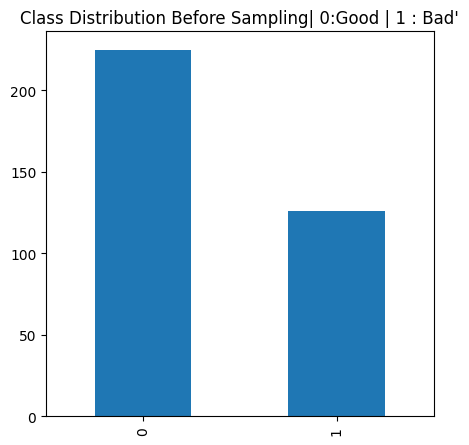

In [171]:
plt.figure(figsize=(5,5))

y.value_counts().plot(kind = "bar", title = "Class Distribution Before Sampling| 0:Good | 1 : Bad'")

In [172]:
y=y.astype(int)

Appling SMOTE to balance the data

In [173]:
# Create balance in the data
from imblearn.over_sampling import SMOTE
import pandas as pd

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


<Axes: title={'center': "Class Distribution After Sampling| 0:Good | 1 : Bad'"}>

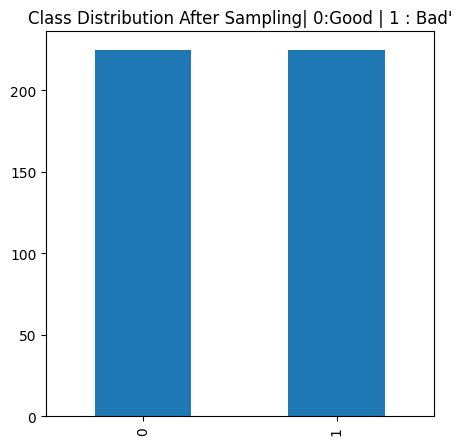

In [174]:
plt.figure(figsize=(5,5))

y_resampled.value_counts().plot(kind = "bar", title = "Class Distribution After Sampling| 0:Good | 1 : Bad'")

In [175]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [176]:
cv_score_list=[]

Random Forest

In [177]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [178]:
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_score_list.append(cv_scores)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

print(confusion_matrix(y_test,y_pred))

print(cv_scores)

0.9444444444444444
[[42  0]
 [ 5 43]]
[0.94444444 0.91666667 0.875      0.94444444 0.91666667]


XG Boost

In [179]:
xg=xgb.XGBClassifier()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

In [180]:
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

cv_scores = cross_val_score(xg, X_train, y_train, cv=5)
cv_score_list.append(cv_scores)
print(cv_scores)

0.9111111111111111
[[42  0]
 [ 8 40]]
[0.94444444 0.91666667 0.86111111 0.93055556 0.93055556]


Decision Tree

In [181]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [182]:
accuracy=accuracy_score(y_test,y_pred)

print(accuracy)
print(confusion_matrix(y_test,y_pred))

cv_scores = cross_val_score(dt, X_train, y_train, cv=5)
cv_score_list.append(cv_scores)
print(cv_scores)

0.8888888888888888
[[41  1]
 [ 9 39]]
[0.83333333 0.91666667 0.80555556 0.93055556 0.875     ]


SVM

In [183]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

In [184]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
print(confusion_matrix(y_test,y_pred))

cv_scores = cross_val_score(svm, X_train, y_train, cv=5)
cv_score_list.append(cv_scores)
print(cv_scores)

0.9333333333333333
[[42  0]
 [ 6 42]]
[0.95833333 0.93055556 0.88888889 0.95833333 0.93055556]


Neural Network

In [185]:
model=Sequential(
    [
        Dense(128,activation='relu',input_shape=(X_train.shape[1],)),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(16,activation='relu'),
        Dense(1,activation='sigmoid')
    ]
)

In [186]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_train,y_train))

y_pred = (model.predict(X_test) > 0.8).astype('int32')
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test,y_pred))

cv_scores=history.history['val_accuracy'] #To get the cross validation accuracy.
cv_score_list.append(cv_scores)
print(cv_scores)


Epoch 1/10
12/12 [==============================] - 2s 40ms/step - loss: 0.6443 - accuracy: 0.5250 - val_loss: 0.5708 - val_accuracy: 0.7278
Epoch 2/10
12/12 [==============================] - 0s 15ms/step - loss: 0.5332 - accuracy: 0.8194 - val_loss: 0.4663 - val_accuracy: 0.8528
Epoch 3/10
12/12 [==============================] - 0s 9ms/step - loss: 0.4273 - accuracy: 0.8750 - val_loss: 0.3537 - val_accuracy: 0.9056
Epoch 4/10
12/12 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.9111 - val_loss: 0.2577 - val_accuracy: 0.9444
Epoch 5/10
12/12 [==============================] - 0s 11ms/step - loss: 0.2328 - accuracy: 0.9389 - val_loss: 0.1985 - val_accuracy: 0.9583
Epoch 6/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1745 - accuracy: 0.9556 - val_loss: 0.1448 - val_accuracy: 0.9583
Epoch 7/10
12/12 [==============================] - 0s 6ms/step - loss: 0.1376 - accuracy: 0.9639 - val_loss: 0.1177 - val_accuracy: 0.9694
Epoch 8/10
12/12 

Accuracies of the models

In [188]:
cv_score_list

[array([0.94444444, 0.91666667, 0.875     , 0.94444444, 0.91666667]),
 array([0.94444444, 0.91666667, 0.86111111, 0.93055556, 0.93055556]),
 array([0.83333333, 0.91666667, 0.80555556, 0.93055556, 0.875     ]),
 array([0.95833333, 0.93055556, 0.88888889, 0.95833333, 0.93055556]),
 [0.7277777791023254,
  0.8527777791023254,
  0.9055555462837219,
  0.9444444179534912,
  0.9583333134651184,
  0.9583333134651184,
  0.9694444537162781,
  0.9666666388511658,
  0.9750000238418579,
  0.9722222089767456]]

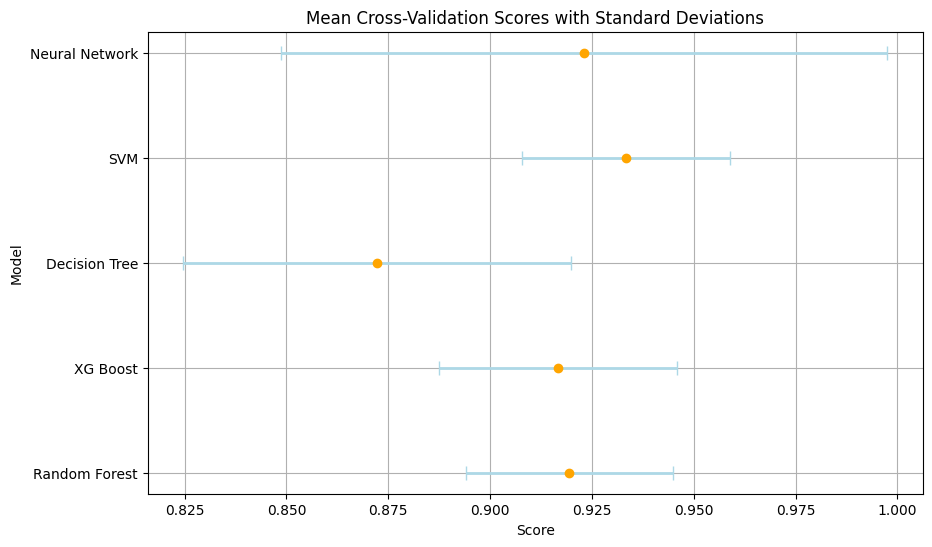

In [187]:
means = [np.mean(scores) for scores in cv_score_list]
std_devs = [np.std(scores) for scores in cv_score_list]

plt.figure(figsize=(10, 6))

plt.errorbar(means, range(len(cv_score_list)), xerr=std_devs, fmt='o', capsize=5, color='orange', ecolor='lightblue', elinewidth=2)

plt.yticks(ticks=range(len(cv_score_list)), labels=['Random Forest', 'XG Boost','Decision Tree' , 'SVM', 'Neural Network'])

plt.grid(True)
plt.title('Mean Cross-Validation Scores with Standard Deviations')
plt.ylabel('Model')
plt.xlabel('Score')
plt.show()